# EDA Project: King County Home Sales

Author: *Maximilian Hallenberger*

### 1.) Research questions
---------------------------------------------
* **Question 1**: How does the timing (day/month) influence the marked price? <br/>
* **Hypotheses**: Winter is usually the cheapest time of year to purchase a home. Sellers are often motivated, which automatically translates into an advantage to you. Most people suspend their listings from around Thanksgiving to the New Year because they assume buyers are scarce.
* **Indicator**: Price / Month of Purchase / Day of Purchase
 ---------------------------------------------
 * **Question 2**: How does the state of renovation influence the marked price?
* **Hypotheses**: Renovations are expensive and increase the value of any house. There should be a marked increase in price with a higher renovation status.
* **Indicator**: Year built vs. Year Renovated / Renovation Status vs. Price
 ---------------------------------------------
 * **Question 3**: Where are houses most expensive?
* **Hypotheses**: Houses in the city center should exceed the price of suburbs which themselves should be more expensive to the countryside.
* **Indicator**: Location (city + country house) / Price
---------------------------------------------

### 2.) Stakeholder

Client: *William Rodriguez*

---------------------------------------------
##### Needs: 
Wants two houses (two People).

*House Nr. 1*: Country house, best timing and non-renovated are important.

*House Nr. 2*: Fast and central location.

##### Budget: 
For house outside the city < 500k (seems right, vacation home and they asked for no renovation and best timing)
House inside the city roughly 1 Mill. (Location is more important than money)

##### Grade:
Building grade should be at least 7 for the city house (Average grade of construction and design)

For the Countryside house a simpler design (grade > 5) is sufficient as well

##### Size:
Country House should be large but not too large (between 50k and 100k sqft)

#### Bedrooms:
The Rodriguez are a happy and modest couple, they need one bedroom for themselves and a guest bedroom in the city.
The countryside house only needs a single bedroom.

---------------------------------------------
<br/>

### 3.) Required Modules

In [12]:
# Imports of modules

import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime as dt
import altair as alt
from scipy.stats import ttest_ind
from scipy.stats import levene


In [13]:
# Import the data
df = pd.read_csv('data/King_County_House_prices_dataset.csv')

### 4.) Initial Screening of the Dataset

In [14]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [16]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [17]:
df.shape

(21597, 21)

In [18]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

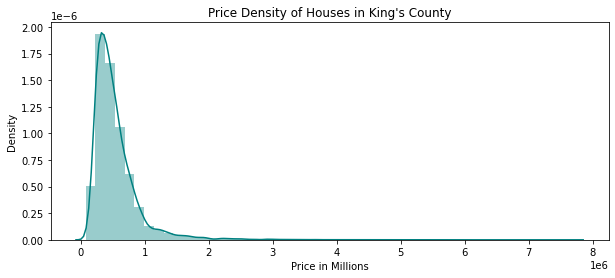

In [19]:
# More in depth Screening

# House Prices in Overview
plt.figure(figsize=(10,4))
logged_price_dist = sns.distplot(df["price"], color='teal')
logged_price_dist.set(xlabel="Price in Millions", title="Price Density of Houses in King's County")
plt.show()

# Takeaway: Most hoses appear to be priced around 500k, some high value outliers exist


### 5.) Data Processing

In [20]:
# Added a column which extracted the Day, Month, and Year of purchase from date
df2 = df.copy()
df2['year_of_purchase'] = pd.to_datetime(df2['date']).dt.year
df2['month_of_purchase'] = pd.to_datetime(df2['date']).dt.month
df2['day_of_purchase'] = pd.to_datetime(df2['date']).dt.day
df2["day_of_week"] = pd.to_datetime(df2['date']).dt.day_name()

# Added columns for the squarefoot price of living areas and lot areas
df2["price_living"]=df2["price"]/df2["sqft_living"]
df2["price_lot"]=df2["price"]/df2["sqft_lot"]

# Changed 0.0000 values in yr_renovated to numpy NaN
df2["yr_renovated"] = df2.yr_renovated.replace(to_replace=0, value=np.nan)

# Added a column which specifies the renovation status where 0 is equal to not renovated and 1 to renovated
df2["renovated"] = np.where(df2.yr_renovated > 0, 1, 0) 

### 6.) Geographical Distinction of Areas

In [21]:
# Zipcodes defining inner city and rural areas

# Overview

# Zipcodes
zipcodes = np.unique(df2[['zipcode']].values)
np.count_nonzero(zipcodes) 

# Takeaway: There are 70 zipcodes in total

# Plot map data overview, all houses
points_all = alt.Chart(df2).mark_circle(opacity=0.7, size = 3).encode(
    longitude='long:Q',
    latitude='lat:Q',
    tooltip='zipcode',
    color = 'zipcode:O',
).project(
    "albersUsa"
).properties(
    width=500,
    height=400,
    title = 'All houses'
)


# Takeaway: Zipcodes are ordered geographically! Inner city Zipcodes break at a certain number code. That makes it easier to subdivide the different areas.

In [22]:
# Differentiate between city and rural based on zipcodes identified on map view

df2["zipcode"] = df2["zipcode"].astype(str)

# Zipcodes which belong to the countryside and the city center
zip_country = ["98077","98019","98224","98288","98024","98014","98053","98065","98045","98027","98038","98022","98092","98042","98010","98051","98058","98059","98070"]
zip_center=["98117","98107","98199","98119","98116","98136","98126","98106","98108","98118","98144","98134","98104","98101","98121","98109","98112","98122","98103","98195","98115","98105","98185","98102","90145","98124","98133","98125","98177"]

# Zipcodes belonging to the city area in general
zip_all = df2.zipcode.unique()
zip_city = np.setdiff1d(zip_all, zip_country)

# Zipcodes belonging to the suburbs
zip_sub=np.setdiff1d(zip_city, zip_center)

# Add lables to the dataframe
zip_sub1=["suburbs"]*len(zip_sub)
zip_country1 = ["country"]*len(zip_country)
zip_center1 = ["center"]*len(zip_center)

dict_country = dict(zip(zip_country,zip_country1))
dict_center = dict(zip(zip_center,zip_center1))
dict_sub = dict(zip(zip_sub,zip_sub1))

dict_zip = {**dict_country,**dict_center,**dict_sub}

# create column "location" that defines city or country
df2["location"] = df2["zipcode"].map(dict_zip)

df2


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,year_of_purchase,month_of_purchase,day_of_purchase,day_of_week,price_living,price_lot,renovated,location
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1340,5650,2014,10,13,Monday,188.050847,39.274336,0,suburbs
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1690,7639,2014,12,9,Tuesday,209.338521,74.288870,1,center
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,2720,8062,2015,2,25,Wednesday,233.766234,18.000000,0,suburbs
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1360,5000,2014,12,9,Tuesday,308.163265,120.800000,0,center
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1800,7503,2015,2,18,Wednesday,303.571429,63.118812,0,suburbs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,1530,1509,2014,5,21,Wednesday,235.294118,318.302387,0,center
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,1830,7200,2015,2,23,Monday,173.160173,68.811285,0,suburbs
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,1020,2007,2014,6,23,Monday,394.216667,297.852593,0,center
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,1410,1287,2015,1,16,Friday,250.000000,167.504188,0,country


In [23]:
# Define borders of inner and outer city (iterative by looking at map)
df_citycenter = df2.query('location == "center"')
df_suburbs = df2.query('location == "suburbs"')
df_country = df2.query('location == "country"')


In [24]:
fig = px.scatter_mapbox(df2, lat="lat", 
                        lon="long", 
                        hover_name="location", 
                        color="location",
                        color_continuous_scale=px.colors.cyclical.IceFire)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig.show()

### 7.) Investigation into regional differences between city, suburbs, and the countryside

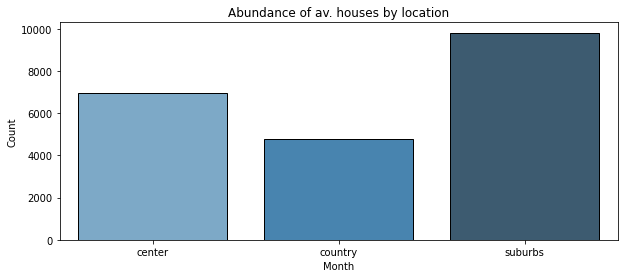

In [25]:
# Overview of potential correlation

# Creating groups for areas
locdf = df2.groupby(by=["location"])
locdf.head()
# Barplot to display the number of bought houses by month
plt.figure(figsize=(10,4))
houses_freq = locdf.size()
houseavplot = sns.barplot(houses_freq.index, houses_freq.values, palette="Blues_d", edgecolor="black", lw=1)
houseavplot.set(xlabel="Month", ylabel="Count", title="Abundance of av. houses by location")
plt.show()

# Takeaway: most houses are in the suburbs

Text(0, 0.5, 'Living area [sqft]')

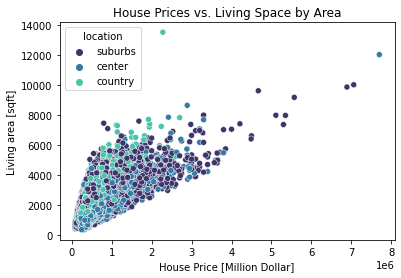

In [26]:
sns.scatterplot(data=df2, x="price", y="sqft_living",hue="location", palette="mako");
plt.title('House Prices vs. Living Space by Area')
plt.xlabel('House Price [Million Dollar]')
plt.ylabel('Living area [sqft]')

# Suburbs are quite scattered whereas you seem to pay more per square foot in the city than in the countryside
# However it is not quite clear if suburbs are cheaper than city center houses

In [27]:
# Is there difference in price between houses in the suburbs and the city?
suburbs = df2[df2['location'] == "suburbs"]
center = df2[df2['location'] == "center"]

# Test for equal variances, choose levene since distr. is not normal distr.
stat, p = levene(suburbs['price'], center['price'])
# p is lower than 0.05, variances are not equal, proceed with welch's ttest
print(p)

ttest_ind(suburbs['price'], center['price'], equal_var = False)
# P-value is lower than 0.05, we assume that there is a significant difference in means

# Takeaway: Houses are cheaper in the suburbs

1.3359215777026158e-16


Ttest_indResult(statistic=-6.580058563727815, pvalue=4.845128280783352e-11)

In [28]:
# Is there difference in living size between houses in the suburbs and the city?

# Test for equal variances, choose levene since distr. is not normal distr.
stat, p = levene(suburbs['sqft_living'], center['sqft_living'])
# p is lower than 0.05, variances are not equal, proceed with welch's ttest
print(p)

ttest_ind(suburbs['sqft_living'], center['sqft_living'], equal_var = False)
# P-value is lower than 0.05, we assume that there is a significant difference in means

# Takeaway: Houses are also larger in the suburbs!

1.382795512185149e-29


Ttest_indResult(statistic=27.531969797671614, pvalue=4.047532116231696e-163)

<AxesSubplot:xlabel='location', ylabel='floors'>

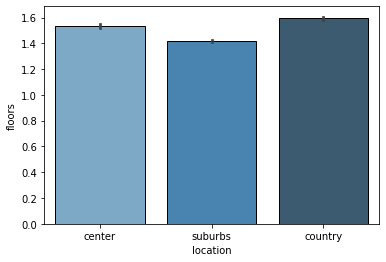

In [29]:
sns.barplot(data = df2, x = 'location', y = 'floors', palette='Blues_d', edgecolor="black", lw=1,
order = ['center', 'suburbs', 'country'])

# Takeaway: Houses in the countryside seem to be slightly larger on average than those in the city. In actuality it might rather be 
#           that most houses in the city center consist of one-floor apartments. 

### 8.) Investigation of the timing of house purchases

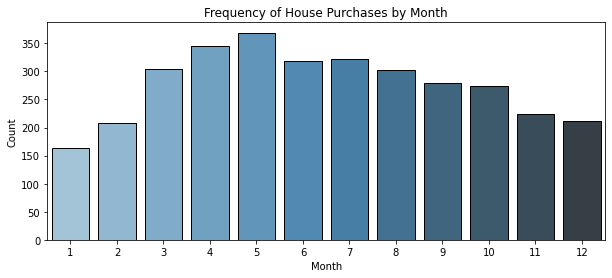

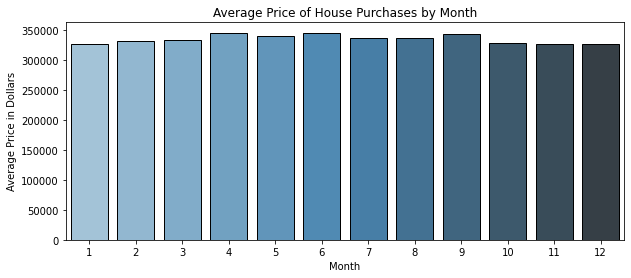

In [30]:
# Filter for houses under 500k price in rural areas
df_country_2 = df_country.query ('price < 500000')

# Creating groups for months
month_group_less = df_country_2.groupby(by=["month_of_purchase"])

# Barplot to display the number of bought houses by month
plt.figure(figsize=(10,4))
month_freq = month_group_less.size()
month_freq_plot = sns.barplot(month_freq.index, month_freq.values, palette="Blues_d", edgecolor="black", lw=1)
month_freq_plot.set(xlabel="Month", ylabel="Count", title="Frequency of House Purchases by Month")
plt.show()

# Changes in mean price by month
plt.figure(figsize=(10,4))
month_price = month_group_less["price"].mean()
month_avg_price_plot = sns.barplot(month_price.index, month_price.values, palette="Blues_d", edgecolor="black", lw=1)
month_avg_price_plot.set(xlabel="Month", ylabel="Average Price in Dollars", title="Average Price of House Purchases by Month")
plt.show()

# Takeaway: While there are fluctuations in houses sold (Jan/Feb are f.ex. quite low), there is no clear trend in price. 

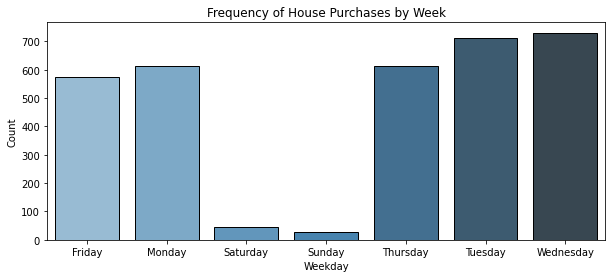

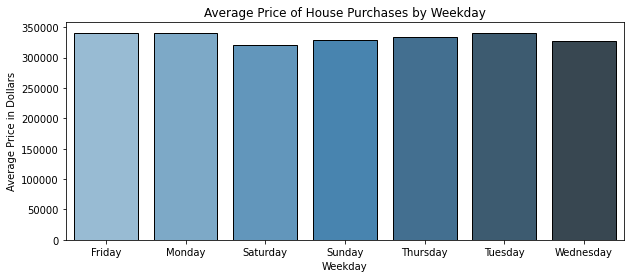

In [31]:
# Creating groups for days
day_group_less = df_country_2.groupby(by=["day_of_week"])
# Take away: There seems to be a slight decrease in price in February, but in general there is limited use in timing 

# Barplot to display the number of bought houses by month
plt.figure(figsize=(10,4))
day_freq = day_group_less.size()
day_freq_plot = sns.barplot(day_freq.index, day_freq.values, palette="Blues_d", edgecolor="black", lw=1)
day_freq_plot.set(xlabel="Weekday", ylabel="Count", title="Frequency of House Purchases by Week")
plt.show()

# Changes in mean price by month
plt.figure(figsize=(10,4))
day_price = day_group_less["price"].mean()
day_avg_price_plot = sns.barplot(day_price.index, day_price.values, palette="Blues_d", edgecolor="black", lw=1)
day_avg_price_plot.set(xlabel="Weekday", ylabel="Average Price in Dollars", title="Average Price of House Purchases by Weekday")

plt.show()

# Takeaway: There is again a clear influence of weekday on sales (much less sales on weekends). However there is no influence on price.

### 9.) Investigation of different Renovation States

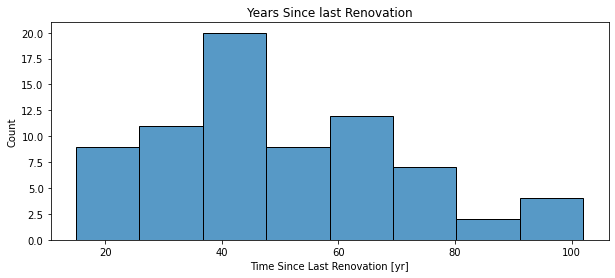

(74, 30)

In [32]:
# Influence of renovation status on houses in rural areas:

unren_houses = df_country_2.query('renovated == 0') # 0 as an entry is interpreted as house being not renovated
# 20853 houses are not renovated
renovated_houses = df_country_2[df_country_2["renovated"] == 1]
# Only 115 houses within the area are renovated

renovated_houses.eval('time_since_ren = yr_renovated - yr_built', inplace = True)

# Test plot to see how big of a difference there is between house building and house renovation
plt.figure(figsize=(10,4))

ren_stat_plot = sns.histplot(renovated_houses.time_since_ren, palette="Blues_d", edgecolor="black", lw=1)
ren_stat_plot.set(xlabel="Time Since Last Renovation [yr]", ylabel="Count", title="Years Since last Renovation")
plt.show()

renovated_houses.shape

# Takeaway: There is a very limited number of houses in the rural area which have undergone renovations at all, for most of them renovation took place 
# further back than 40 years and can therefore hardely be called "renovated"


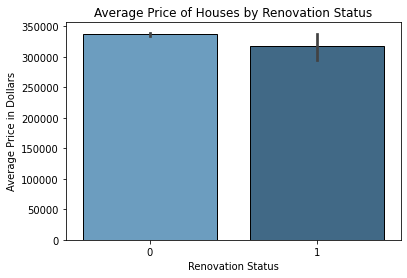

In [33]:
renvsprice = sns.barplot(data = df_country_2, x = 'renovated', y = 'price',edgecolor="black", lw=1,palette="Blues_d");
renvsprice.set(xlabel="Renovation Status", ylabel="Average Price in Dollars", title="Average Price of Houses by Renovation Status");

# Takeaway: There seems to be limited difference in housing prices in the countryside 
#              between houses that are renovated and those which are unrenovated.

In [34]:
# Does it actually make a difference in price if we have a renovated house?
renovated = df_country_2[df_country_2['renovated'] == 1]
non_renovated = df_country_2[df_country_2['renovated'] == 0]

# Test for equal variances, choose levene since distr. is not normal distr.
stat, p = levene(renovated['price'], non_renovated['price'])
# p is larger than 0.05 (ca. 0.25), so equal variances are assumed

ttest_ind(renovated['price'], non_renovated['price']);

# P-value is slightly larger than 0.05, we assume that there is no significant difference in means

# Takeaway: We can tell our clients that renovation status will have no effect on price, therefore searching for a renovated house might be better
#           since it is likely in better condition.

### 10.) The Search for the perfect House!

#### 10.1 House Nr. 1 - The Countryside House


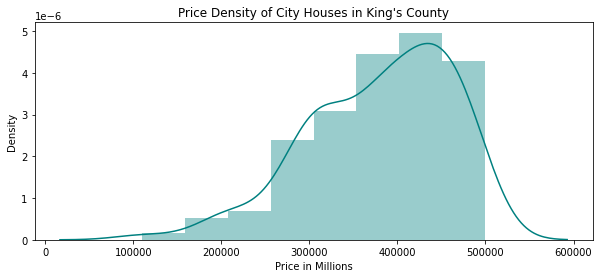

In [35]:
# Distribution of Prices in country area below 500 k.
# Only houses in rural zipcodes, which cost less than 500k, lie within certain thresholds of lot size, and are at least of grade 6
df_country_3 = df_country_2.query('sqft_lot >= 50000 and sqft_lot <= 100000')
df_country_4 = df_country_3.query('grade >= 6')

plt.figure(figsize=(10,4))
logged_price_dist = sns.distplot(df_country_4["price"], color='teal')
logged_price_dist.set(xlabel="Price in Millions", title="Price Density of City Houses in King's County")
plt.show()

# Takeaway: Most houses within the target group are priced around 400k

In [36]:
# Price Distribution of available lots
fig = px.scatter_mapbox(df_country_4, lat="lat", 
                        lon="long", 
                        hover_name="price", 
                        color="price")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig.show()

# Takeaway: Houses of affordable Price are pretty evenly distributed within the country area, Maple Valley, Enumclaw, Vashon Island, and North Bend
#           could be visited for further inquiry.

In [37]:
# Squarefeet of lot available
fig = px.scatter_mapbox(df_country_4, lat="lat", 
                        lon="long", 
                        hover_name="sqft_lot", 
                        color="sqft_lot")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig.show()

# Takeaway: There is only a number of houses which are potential buys

#### 10.2 House Nr. 2 - The Cityhouse

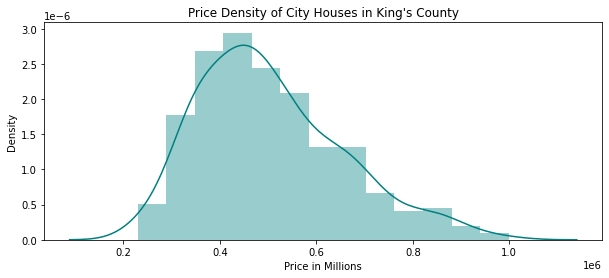

In [38]:
# Requirements for the cityhouse
df_citycenter_2 = df_citycenter.query('price < 1000000 and grade > 7 and bedrooms == 2')

# Distribution of House Prices in city area below 1 Mill.
plt.figure(figsize=(10,4))
logged_price_dist = sns.distplot(df_citycenter_2["price"], color = 'teal')
logged_price_dist.set(xlabel="Price in Millions", title="Price Density of City Houses in King's County")
plt.show()

# Takeaway: Most Houses cost around 400 to 600k and are therefore well within the set budget!

In [39]:

fig = px.scatter_mapbox(df_citycenter_2, lat="lat", 
                        lon="long", 
                        hover_name="price", 
                        color="price")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig.show()

# Takeaway: There is a nice selection of houses which are within the budget of the Rodriguez's. A flat around the Seattle City Center might be best suited.

### 11.) Conclusion

* The Status of renovation does not significantly influence the price of houses in the King County Area.
* There is no data which supports the approach of market timing considering the purchase of a house.
* Considering the budget and other requirements given by the Rodriguez´s a large number of houses appears to be available in the city center area. The amount of country houses is more restricted. However, potential buying targets can be found throughout the countryside area.



#### Appendix: Representation of different House Grades

Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3: Falls short of minimum building standards. Normally cabin or inferior structure.

4: Generally older, low quality construction. Does not meet code.

5: Low construction costs and workmanship. Small, simple design.

6: Lowest grade currently meeting building code. Low quality materials and simple designs.

7: Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8: Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9: Better architectural design with extra interior and exterior design and quality.

10: Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11: Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12: Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13: Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

From https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#g